<a href="https://colab.research.google.com/github/MingzheHu-Duke/BME-59001-Final-Project/blob/main/BME59001_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


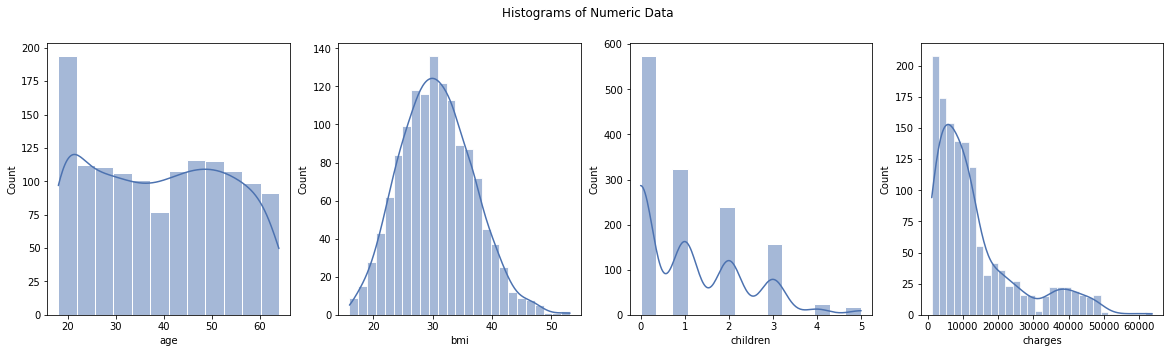

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
count = 0
fig.suptitle("Histograms of Numeric Data")
sns.set_theme(style="darkgrid")
for i in df.select_dtypes(include=[np.number]).columns:
  sns.histplot(data=df, x=i, ax=ax[count], kde=True)
  count += 1

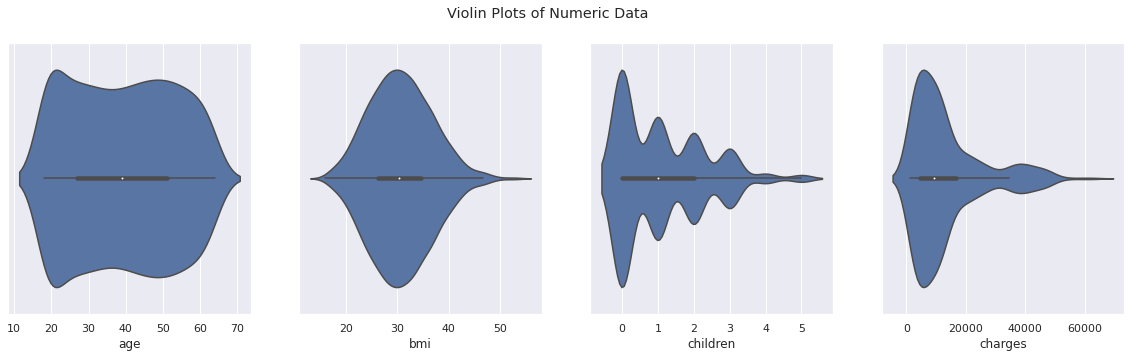

In [7]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
count = 0
fig.suptitle("Violin Plots of Numeric Data")
sns.set_theme(style="darkgrid")
for i in df.select_dtypes(include=[np.number]).columns:
  sns.violinplot(x=df[i], ax=ax[count], orient="h")
  count += 1

In [8]:
for i in ["sex", "smoker", "region"]:
  print(df[i].value_counts())
  print("\n")

male      676
female    662
Name: sex, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64




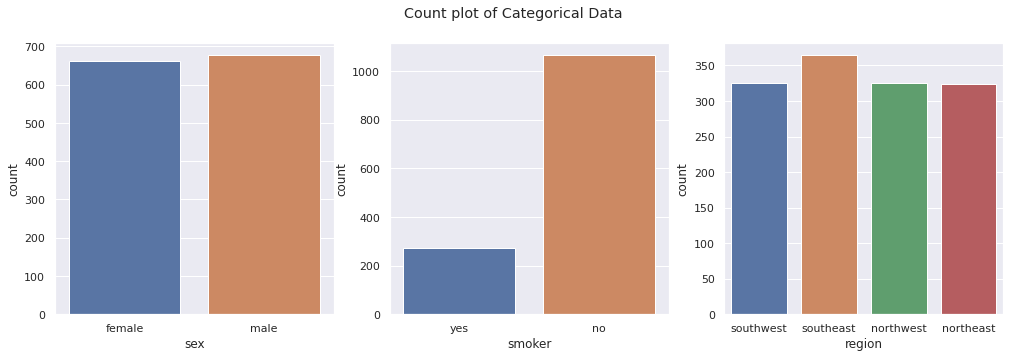

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(17, 5))
count = 0
fig.suptitle("Count plot of Categorical Data")
sns.set_theme(style="darkgrid")
for i in ["sex", "smoker", "region"]:
  sns.countplot(data=df, x=i, ax=ax[count])
  count += 1

In [10]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [11]:
from sklearn.preprocessing import LabelEncoder
#sex
data = df

le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

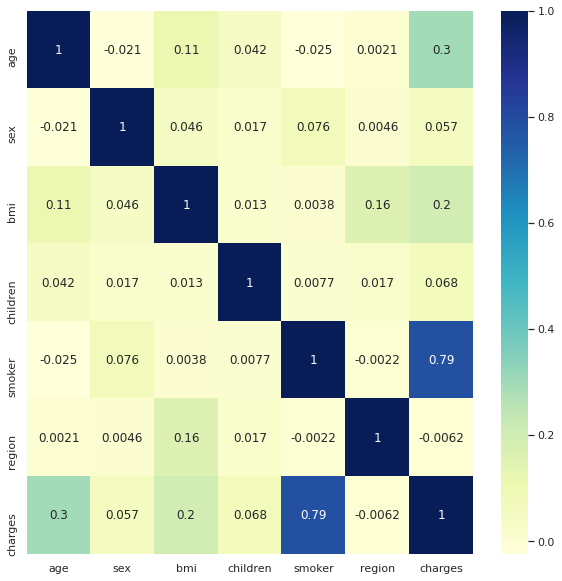

In [12]:
# plotting correlation heatmap 
plt.figure(figsize=(10, 10))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 

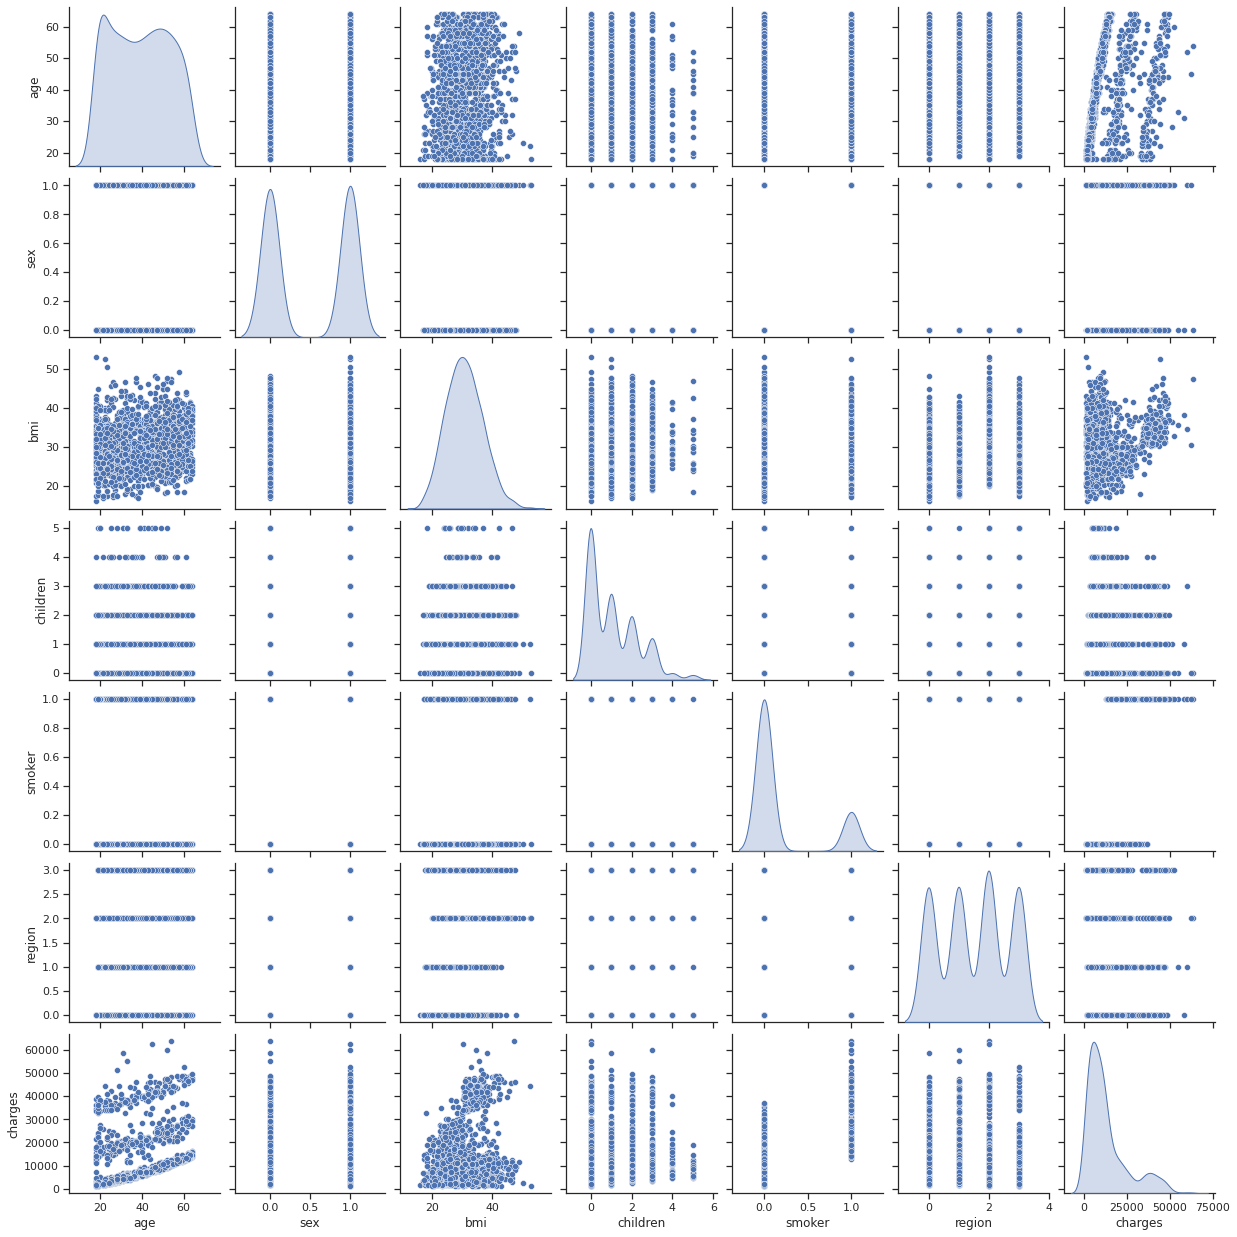

In [13]:
sns.set_theme(style="ticks")

sns.pairplot(data, diag_kind="kde")

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [15]:
print("Total number of observations in our dataset is: {}".format(len(df)))

Total number of observations in our dataset is: 1338


# Descision tree classification

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print("shape of X_train is: {}".format(X_train.shape))
print("shape of X_test is: {}".format(X_test.shape))
print("shape of y_train is: {}".format(y_train.shape))
print("shape of y_test is: {}".format(y_test.shape))


shape of X_train is: (802, 6)
shape of X_test is: (536, 6)
shape of y_train is: (802, 1)
shape of y_test is: (536, 1)


# Test the performance of the decision tree

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_absolute_error')
print(scores)

[-2881.41436492 -3114.28471164 -3030.88069265 -2896.20086991
 -3737.94690998]


In [ ]:
scores = cross_val_score(clf, X, y, cv=5, scoring='r2')
print(scores)

[0.76400961 0.62560774 0.72894932 0.72845076 0.66535463]


#Random Forest Regression

### Data Preprocessing

In [16]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [17]:
# Extract the features
features = df.drop(columns=["charges"])
features.head(1)

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3


In [18]:
print("The shape of our features is:", features.shape)

The shape of our features is: (1338, 6)


In [19]:
labels = df["charges"]
labels.head(1)

0    16884.924
Name: charges, dtype: float64

In [20]:
print("The shape of our labels is:", labels.shape)

The shape of our labels is: (1338,)


In [21]:
# Extract the feature list
feature_list = list(features.columns)
print(feature_list)

['age', 'sex', 'bmi', 'children', 'smoker', 'region']


In [22]:
# Data frame into numpy array
labels = np.array(labels)
features = np.array(features)

In [23]:
# Split the data into training and testing data sets
# Train split ratio is 0.8
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=2021)

In [24]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1070, 6)
Training Labels Shape: (1070,)
Testing Features Shape: (268, 6)
Testing Labels Shape: (268,)


###Train a baseline Random Forest model

In [29]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

In [49]:
rf = RandomForestRegressor(n_estimators=100, criterion="mse", n_jobs=-1, random_state=2021)

print("Parameters currently in use: \n")
pprint(rf.get_params())

Parameters currently in use: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 2021,
 'verbose': 0,
 'warm_start': False}


In [50]:
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=2021, verbose=0, warm_start=False)

### Evaluate the Perfomance of the base line model

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [26]:
# Define residual sum of squares
def rss(y_true, y_pred):
  rss = np.sum(np.square(y_true - y_pred))
  return rss

In [27]:
# Define the function that visualize the performance
def performance_visualization(predictions, labels, train=False):
  limit = max(max(predictions), max(labels)) + 5000
  fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(15, 7), gridspec_kw={'width_ratios': [2, 1]}, sharey=False, sharex=False)
  fig.tight_layout()
  ax1.set_aspect('equal', adjustable='box')
  ax1.set_xlim([0, limit])
  ax1.set_ylim([0, limit])
  ax1.plot(predictions, labels, "bo")
  ax1.plot([0, limit], [0, limit], ls="--", linewidth=4, color="green", label="Perfect Fit")
  ax1.set_title("Prediction vs. Label")
  ax1.title.set_size(25)
  ax1.tick_params(labelsize=15)
  ax1.set_xlabel("Predicted Charges", fontsize=18)
  ax1.set_ylabel("True Charges", fontsize=18)
  ax1.legend()
  residuals = predictions - labels
  if train == True:
   ax2.set_aspect(0.1, adjustable="box")
  else:
   ax2.set_aspect(0.01, adjustable="box")
  ax2.plot(residuals, "ro", label="Risiduals")
  ax2.plot([-1, len(predictions)], [0, 0], ls="--", linewidth=4, color="green", label="Perfect Fit")
  ax2.set_title("Residuals Plot")
  ax2.title.set_size(25)
  ax2.tick_params(labelsize=15)
  ax2.set_xlabel("nth predicted Charge", fontsize=18)
  ax2.set_ylabel("Risiduals", fontsize=18)
  ax2.legend()
  plt.subplots_adjust(wspace=0.1)
  plt.show()

In [28]:
# Define a function that evaluate the performance of model
def evaluate(model, features, labels, training=False, verbose=True):
    predictions = model.predict(features)
    errors = abs(predictions - labels)
    mape = 100 * np.mean(errors / labels)
    accuracy = 100 - mape
    r2 = r2_score(labels, predictions)
    mse = mean_squared_error(labels, predictions)
    mae = mean_absolute_error(labels, predictions)
    if training==False:
      print('Model Performance with Test Data\n')
    else:
      print("Model Performance with Train Data\n")
    print('MAPE (Mean Absolute Percentage Error): {:0.2f}%'.format(mape))
    print('Accuracy : {:0.2f}%'.format(accuracy))
    print("MSE (Mean Squares Error : {}".format(round(mse, 2)))
    print("MAE (Mean Absolute Error : {}".format(round(mae, 2)))
    print("R Squared : {}".format(round(r2, 4)))
    if verbose == True:
      performance_visualization(predictions, labels, training)
    return mape, accuracy, mse, mae, r2
    

Model Performance with Train Data

MAPE (Mean Absolute Percentage Error): 10.93%
Accuracy : 89.07%
MSE (Mean Squares Error : 3264597.38
MAE (Mean Absolute Error : 981.24
R Squared : 0.9779


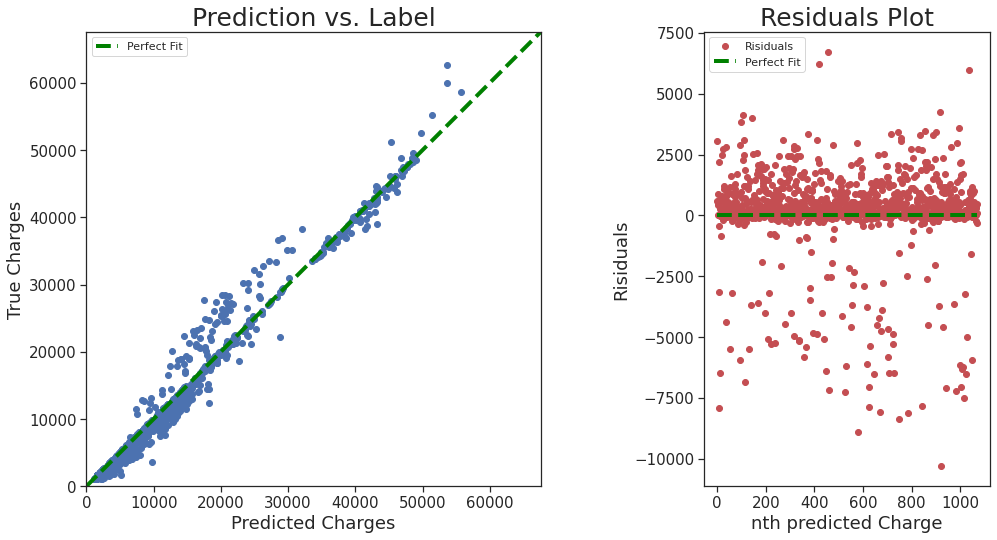

In [261]:
# Evaluate with the training data
base_performance_train = evaluate(rf, train_features, train_labels, training=True)

Model Performance with Test Data

MAPE (Mean Absolute Percentage Error): 35.62%
Accuracy : 64.38%
MSE (Mean Squares Error : 24707946.21
MAE (Mean Absolute Error : 2692.47
R Squared : 0.8248


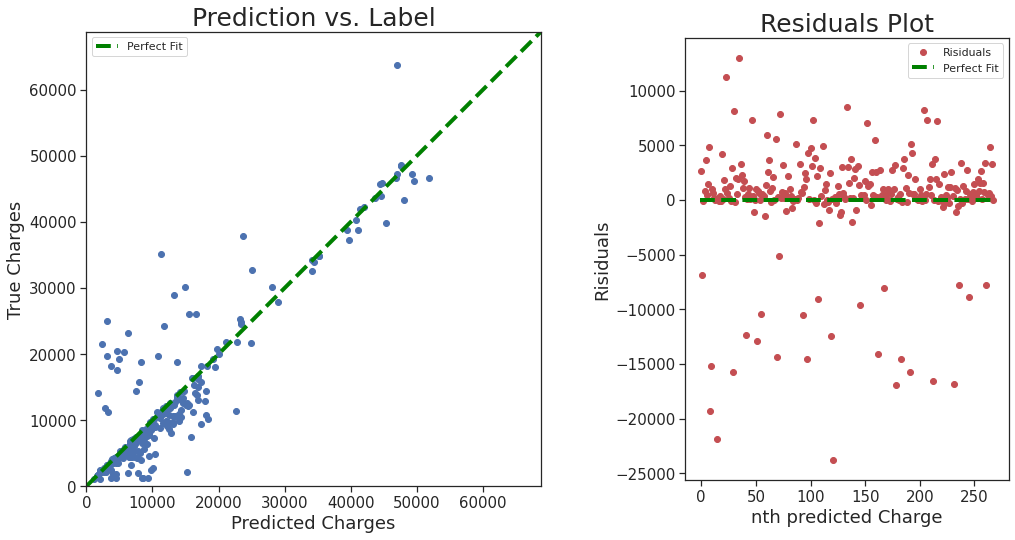

In [262]:
# Evaluate with the test data
base_performance_test = evaluate(rf, test_features, test_labels)

### Hyper Parameters Tunning

#### Random Hyperparameter Grid

In [263]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ["auto", "sqrt"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each treee
bootstrap = [True, False]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Create random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


#### Random Search Cross Validation

In [264]:
# Use the random grid to search for best hyperparameters
# First Create the base model to tune
rf_base = RandomForestRegressor()
# Random search of parameters, using a 4 fold cross validation
# Search across 150 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = random_grid, n_iter = 150, cv = 3, verbose=2, random_state=2021, n_jobs = -1)

# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  5.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

Now lets see the best parameters.

In [265]:
# View the best parameters
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 150 and 4 respectively). More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental.


In [266]:
# The best estimator now is
best_random = rf_random.best_estimator_

Model Performance with Train Data

MAPE (Mean Absolute Percentage Error): 20.74%
Accuracy : 79.26%
MSE (Mean Squares Error : 12235236.73
MAE (Mean Absolute Error : 1881.83
R Squared : 0.9172


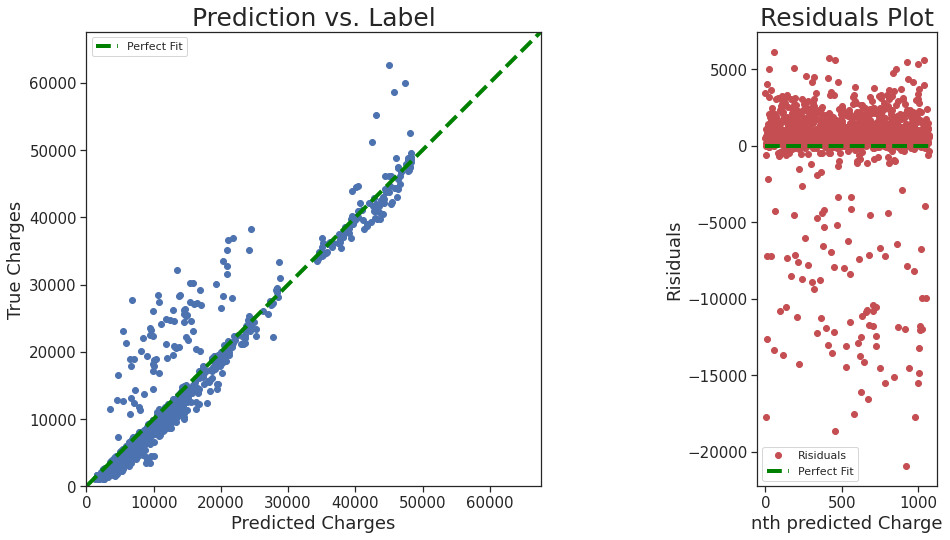

In [267]:
# Evaluate with training data
random_performance_train = evaluate(best_random, train_features, train_labels, training=True, verbose=True)

Model Performance with Test Data

MAPE (Mean Absolute Percentage Error): 28.04%
Accuracy : 71.96%
MSE (Mean Squares Error : 21270541.52
MAE (Mean Absolute Error : 2482.31
R Squared : 0.8491


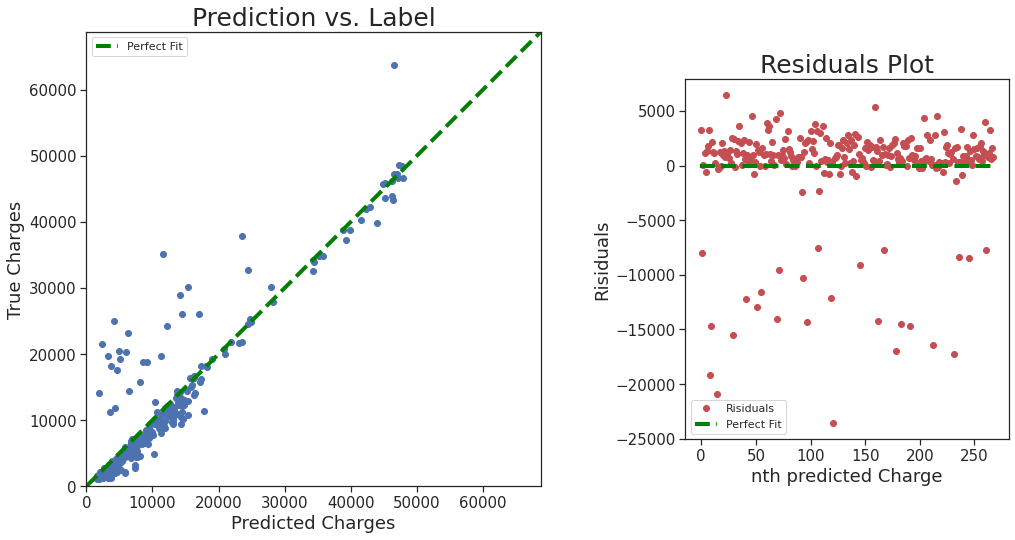

In [268]:
# Evaluate with test data
# Evaluate with training data
random_performance_test = evaluate(best_random, test_features, test_labels, training=False, verbose=True)

Now let's see how much the test accuracy is improved.

In [34]:
def eval_improv(base_accuracy, new_accuracy):
  improve = 100 * (new_accuracy - base_accuracy) / base_accuracy
  print('Improvement of {:0.2f}% is achieved'.format(improve))

In [273]:
eval_improv(base_performance_test[1], random_performance_test[1])

Improvement of 11.78% is achieved


####Grid Search Cross Validation

In [274]:
# View the best parameters
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. 

In [30]:
# Create the base model
rf = RandomForestRegressor(n_estimators=100, criterion="mse", n_jobs=-1, random_state=2021)

In [31]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100, 110, 120, 130],
    'max_features': ["auto"],
    'min_samples_leaf': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 4, 6, 8],
    'n_estimators': [200, 400, 600, 800, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

In [32]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)

Fitting 4 folds for each of 500 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 14.5min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [33]:
# Show the best parameters
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'n_estimators': 200}

Model Performance with Train Data

MAPE (Mean Absolute Percentage Error): 21.43%
Accuracy : 78.57%
MSE (Mean Squares Error : 13629632.76
MAE (Mean Absolute Error : 1988.52
R Squared : 0.9078


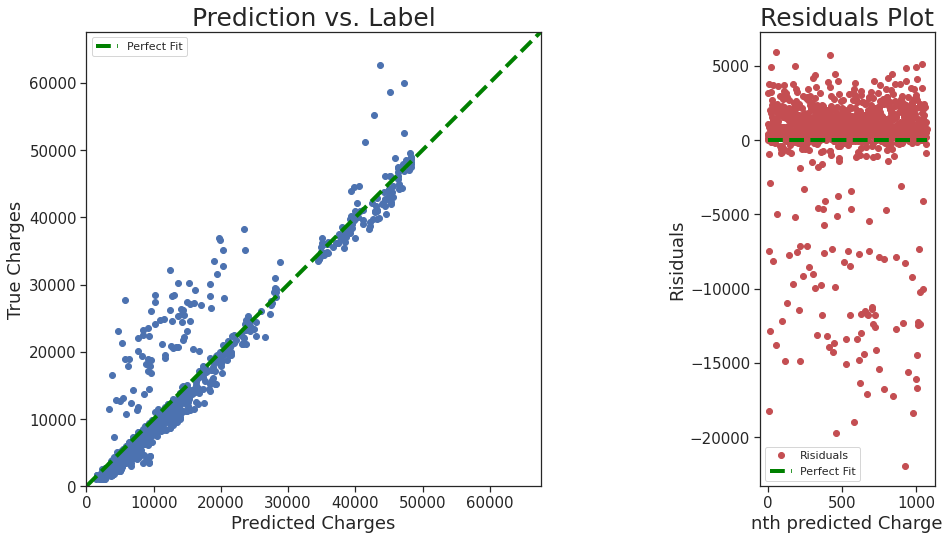

In [35]:
# The best estimator
best_grid = grid_search.best_estimator_
# The performance with training data
grid_performance_train = evaluate(best_grid, train_features, train_labels, training=True, verbose=True)

Model Performance with Test Data

MAPE (Mean Absolute Percentage Error): 27.59%
Accuracy : 72.41%
MSE (Mean Squares Error : 20996564.48
MAE (Mean Absolute Error : 2487.38
R Squared : 0.8511


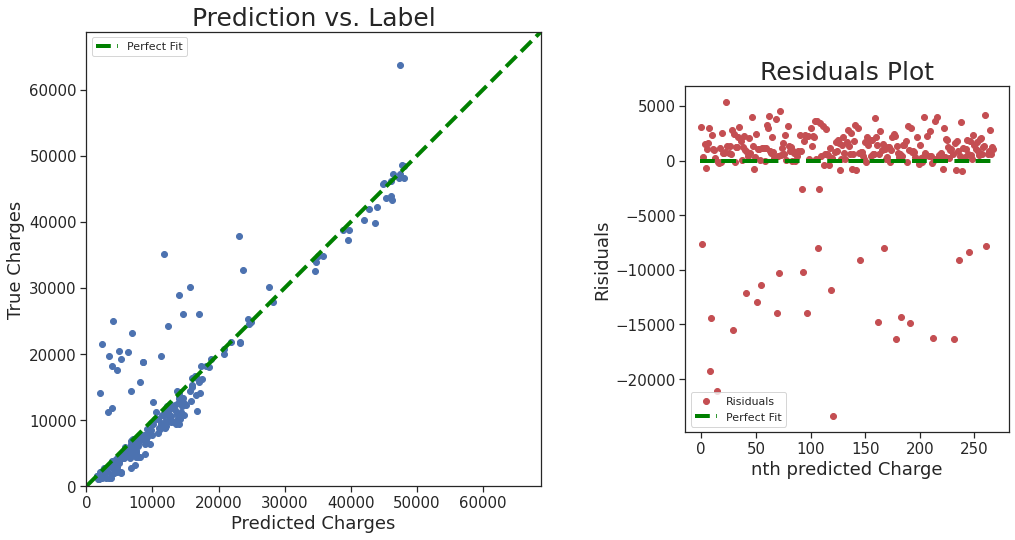

In [36]:
grid_performance_test = evaluate(best_grid, test_features, test_labels, training=False, verbose=True)

In [40]:
# Evaluate performance with test data
# Base model vs. grid search model
eval_improv(64.38, grid_performance_test[1])

Improvement of 12.47% is achieved


As we can see we achieved a even better performance improvement than the random search cross validation with the test data.

In [84]:
def fit_visualization(base_model, model, features, labels):
  import matplotlib.pyplot as plt
  predictions = model.predict(features)
  base_predictions = base_model.predict(features)
  improvements = (base_predictions-labels) - (predictions-labels)
  plt.figure(figsize=(15, 7))
  plt.plot(labels, "o", color="green", label="True Charges")
  plt.plot(predictions, ls="-", color="red", linewidth=2, label="Predicted Charges")
  plt.plot(improvements, "+", color="blue", linewidth=3, label="Prediction Improvements\n(Best model vs. Base Model")
  plt.xlabel("nth observation", fontsize=20)
  plt.ylabel("Charges", fontsize=20)
  plt.title("Fit Plot", fontsize=25)
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  plt.legend()
  plt.show()

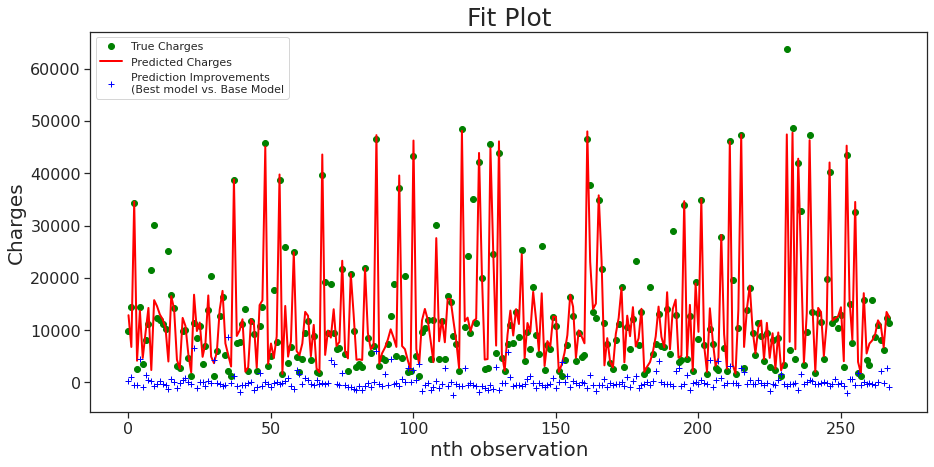

In [85]:
fit_visualization(rf, best_grid, test_features, test_labels)

### Importance of features

In [86]:
# Get numeric feature importance
importances = list(best_grid.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: smoker               Importance: 0.68
Variable: bmi                  Importance: 0.18
Variable: age                  Importance: 0.12
Variable: children             Importance: 0.01
Variable: region               Importance: 0.01
Variable: sex                  Importance: 0.0


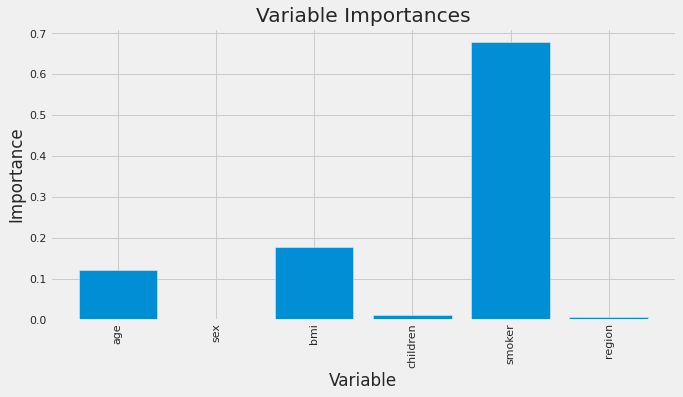

In [89]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use("fivethirtyeight")

plt.figure(figsize=(10, 5))

# List of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation="vertical")

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

###Effects of Changing Paramters

####Number of Estimators

In [90]:
# Visualization

# Grid with only the number of trees changed
tree_grid = {'n_estimators': [int(x) for x in np.linspace(1, 301, 30)]}

# Create the grid search model and fit to the training data
tree_grid_search = GridSearchCV(best_grid, param_grid=tree_grid, verbose = 2, n_jobs=-1, cv = 3,
                                scoring = 'neg_mean_absolute_error', return_train_score=True)
tree_grid_search.fit(train_features, train_labels);

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   10.1s finished


In [96]:
def plot_results(model, param = 'n_estimators', name = 'Num Trees'):
    param_name = 'param_%s' % param

    # Extract information from the cross validation model
    train_scores = model.cv_results_['mean_train_score']
    test_scores = model.cv_results_['mean_test_score']
    train_time = model.cv_results_['mean_fit_time']
    param_values = list(model.cv_results_[param_name])
    
    # Plot the scores over the parameter
    plt.subplots(1, 2, figsize=(10, 6))
    plt.subplot(121)
    plt.plot(param_values, train_scores, 'bo-', label = 'train')
    plt.plot(param_values, test_scores, 'go-', label = 'test')
    plt.legend()
    plt.xlabel(name)
    plt.ylabel('Neg Mean Absolute Error')
    plt.title('Score vs %s' % name)
    
    plt.subplot(122)
    plt.plot(param_values, train_time, 'ro-')
    plt.ylim(ymin = 0.0, ymax = 2.0)
    plt.xlabel(name)
    plt.ylabel('Train Time (sec)')
    plt.title('Training Time vs %s' % name)
    
    
    plt.tight_layout(pad = 4)

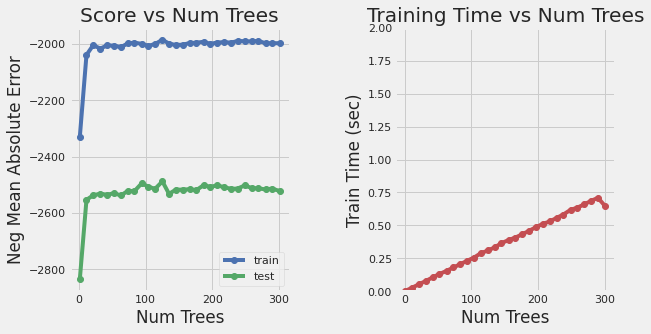

In [97]:
plot_results(tree_grid_search)

###Number of Features at Each Split

In [98]:
# Define a grid over only the maximum number of features
feature_grid = {'max_features': list(range(1, train_features.shape[1] + 1))}

In [101]:
# Create the grid search and fit on the training data
feature_grid_search = GridSearchCV(best_grid, param_grid=feature_grid, cv = 3, n_jobs=-1, verbose= 2,
                                  scoring = 'neg_mean_absolute_error', return_train_score=True)
feature_grid_search.fit(train_features, train_labels);

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.4s finished


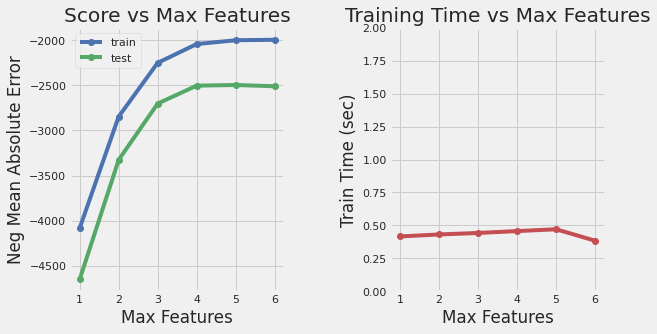

In [102]:
plot_results(feature_grid_search, param='max_features', name = 'Max Features')

### Save and reload the models with pickle

In [110]:
import pickle

In [111]:
# Save the model
filename = "finalized_rf_model.sav"
pickle.dump(best_grid, open(filename, "wb"))

In [112]:
# Reload the model from the disk
loaded_rf = pickle.load(open(filename, "rb"))

In [115]:
loaded_performance_test = evaluate(loaded_rf, test_features, test_labels, training=False, verbose=False)

Model Performance with Test Data

MAPE (Mean Absolute Percentage Error): 27.59%
Accuracy : 72.41%
MSE (Mean Squares Error : 20996564.48
MAE (Mean Absolute Error : 2487.38
R Squared : 0.8511


In [113]:
results = loaded_rf.score(test_features, test_labels)
print(results)

0.8510812791822832
